<div style="background-color: #FAD4C0; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: black; font-size: 40px; font-weight: bold; text-align: center; text-shadow: 1px 1px 1px #000000;">Problem Statement 2: Position Analysis
</h1>
</div>

# Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats


# Data Loading

In [3]:
import pandas as pd
df= pd.read_csv("new_sports.csv")
df.head()

,Serial ID,Unnamed: 0,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11.0,2.0,...,22,6,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2.0,16.0,...,27,6,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0.0,13.0,...,23,5,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13.0,1.0,...,3,4,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6.0,8.0,...,12,8,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022


In [4]:
# calculating the null values
null_values = df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [5]:
null_values = df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [6]:
print(df.duplicated().sum())

0


# Analyze player positions to identify the highest and lowest number of players. 

In [16]:

position_counts = df['Position'].value_counts()
print(position_counts)


Goalkeeper    4398
Forward       4205
Defender      4063
Midfielder    3962
Name: Position, dtype: int64


# Using statistical analysis to determine if the distribution of players across positions is significantly different from a uniform distribution. 

In [8]:
total_players = len(df)

# Expected uniform distribution
expected_counts = [total_players / len(position_counts)] * len(position_counts)

# Chi-square test
chi2, p_value = stats.chisquare(position_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")


Chi-square statistic: 25.79889343276401, p-value: 1.0508267179826103e-05


# Average age per position

In [9]:
import pandas as pd
import plotly.express as px

# Calculate the average age per position
avg_age_per_position = df.groupby('Position')['Age'].mean().sort_values(ascending=False)

# Create a bar plot for average age per position
fig1 = px.bar(avg_age_per_position, title='Average Age per Position')
fig1.update_layout(xaxis_title='Position', yaxis_title='Average Age')
fig1.show()


# Total goals per position

In [10]:
total_goals_per_position = df.groupby('Position')['Goals'].sum().sort_values(ascending=False)

fig2 = px.bar(total_goals_per_position, title='Total Goals per Position')
fig2.update_layout(xaxis_title='Position', yaxis_title='Total Goals')
fig2.show()

# Plot showing the count of players for each position 

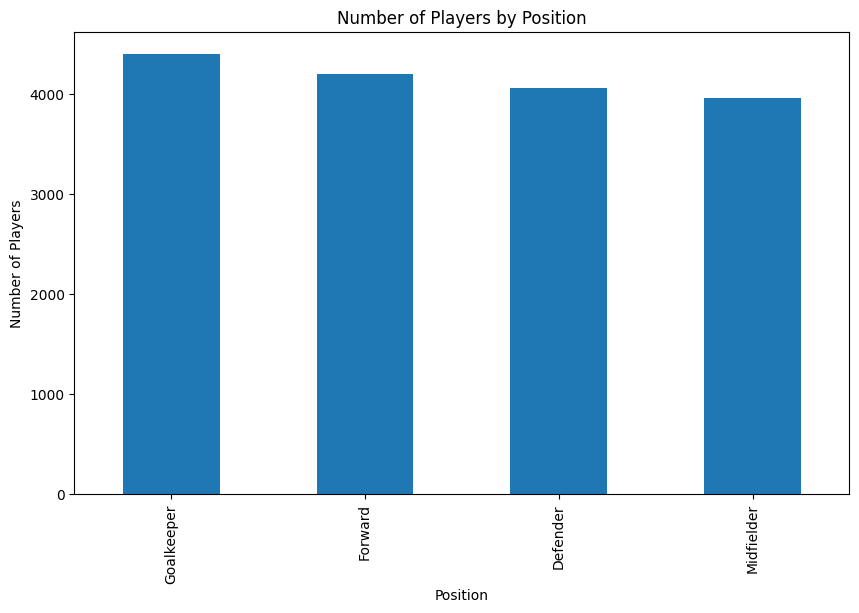

In [12]:
import matplotlib.pyplot as plt

# Bar plot for the count of players in each position
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.title('Number of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.show()


# Distribution of players by position

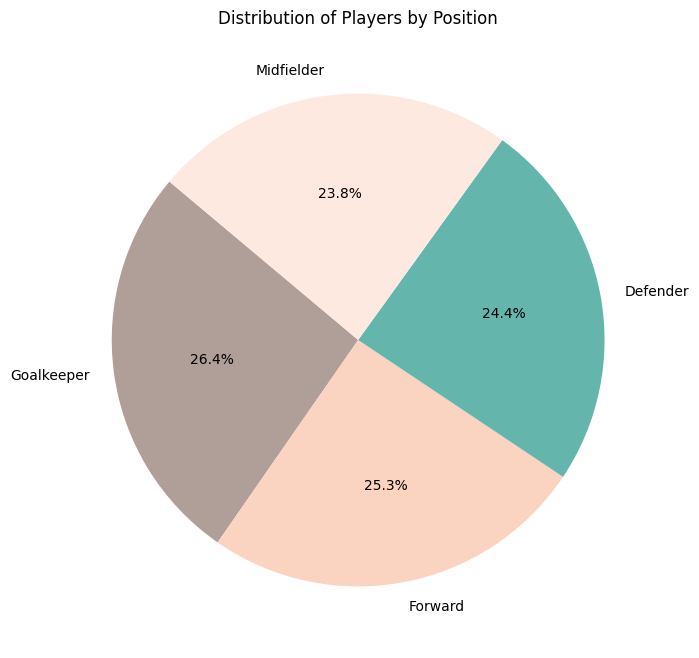

In [15]:
# Pie chart for the distribution of players by position
colors = ['#B09E99', '#FAD4C0', '#64B6AC', '#FEE9E1']
plt.figure(figsize=(8, 8))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Players by Position')
plt.ylabel('')  # Hide the y-label for the pie chart
plt.show()

# Analysis the height of players by position

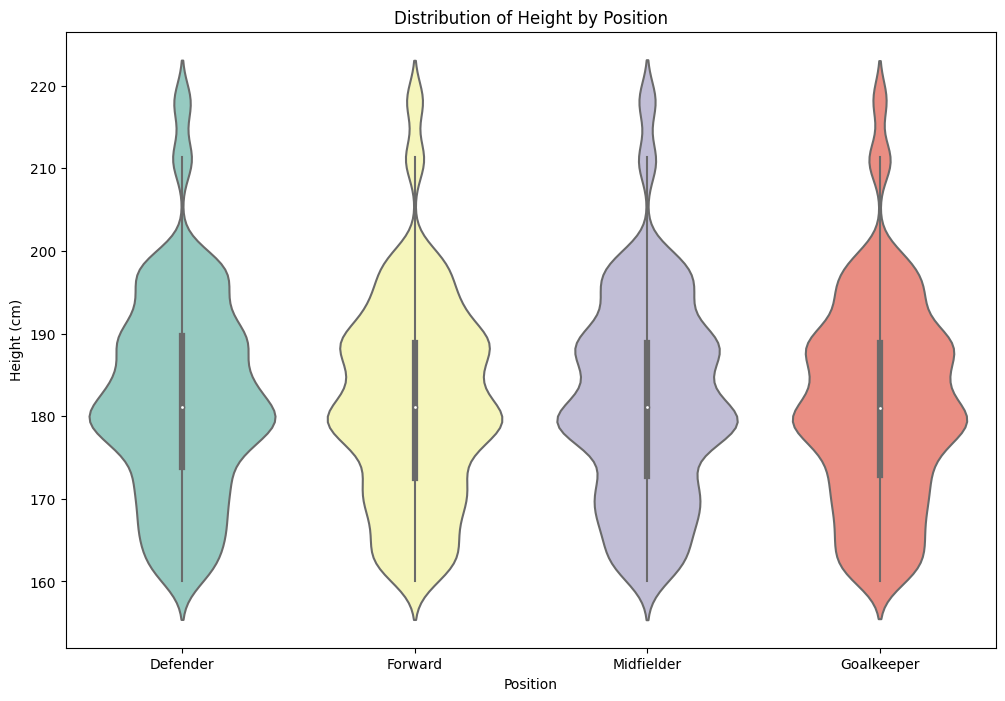

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Position', y='Height', data=df, palette='Set3')
plt.title('Distribution of Height by Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')
plt.show()  

# Analysing average goals by position

In [18]:
avg_goals_per_position = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)

fig3 = px.bar(avg_goals_per_position, title='Average Goals per Position')
fig3.update_layout(xaxis_title='Position', yaxis_title='Average Goals')
fig3.show()


# Analysing average assists by position

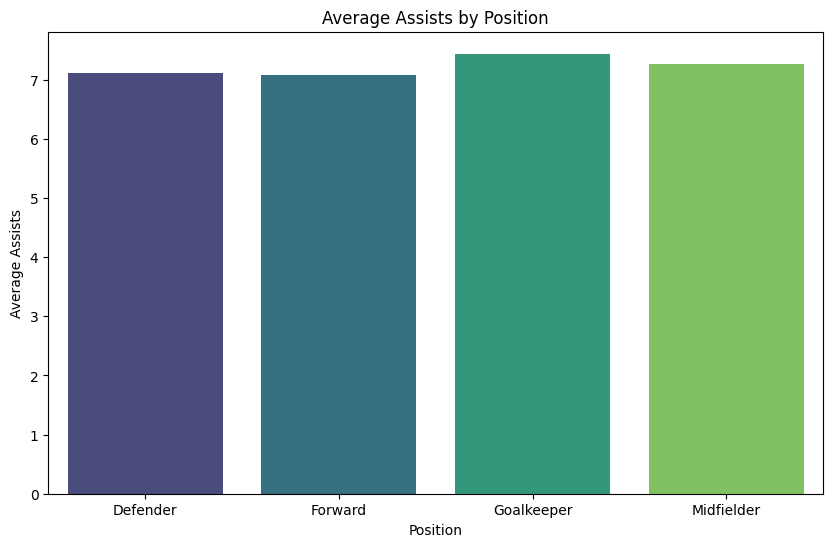

In [19]:
performance_by_position = df.groupby('Position')[['Goals', 'Assists']].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=performance_by_position.index, y=performance_by_position['Assists'], palette='viridis')
plt.title('Average Assists by Position')
plt.xlabel('Position')
plt.ylabel('Average Assists')
plt.show()

# Performing a chi-square test to validate the findings.

In [18]:
# Chi-square test
chi2, p_value = stats.chisquare(position_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The distribution of players across positions is significantly different from a uniform distribution (p < 0.05).")
else:
    print("The distribution of players across positions is not significantly different from a uniform distribution (p >= 0.05).")


Chi-square statistic: 25.79889343276401, p-value: 1.0508267179826103e-05
The distribution of players across positions is significantly different from a uniform distribution (p < 0.05).
